[View in Colaboratory](https://colab.research.google.com/github/mariosky/databook/blob/master/DataLoad.ipynb)

#Colab and Jupyter Notebooks Quick Tour

##Welcome

First we are going to visit a notebbok from [Colab](https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=9J7p406abzgl).

## Loading  and saving data

There are several options for Google external sources:

* Local files
* Google Drive
* Google Sheets
* Google Cloud Storage

 


###Upload local files

With this [snippet](https://colab.research.google.com/notebooks/io.ipynb) we can choose a file to upload from our local system:

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving auto-mpg.data to auto-mpg.data
User uploaded file "auto-mpg.data" with length 30286 bytes


We can check to see if it was uploaded correctly by using a system call: 

In [10]:
!ls

auto-mpg.data  datalab


### Upload a file from Google Drive using  [PyDrive](https://googledrive.github.io/PyDrive/docs/build/html/index.html)

We must install the PyDrive library first:

In [1]:
!pip install -U -q PyDrive

We need to import the libraries we need

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

We must first authenticate with google and create the `GoogleDrive` client.

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Now  we can download the file and print its contents.  
If an output is to long we can delete it with the corresponding option in the *code cell* menu.



In [0]:
data = drive.CreateFile({'id': '1pi40wcRtqCdqwbBx9ISrAZVLHF-MMQox'})
print('Downloaded content "{}"'.format(data.GetContentString()))

###Upload a file from the web

Another option is to download the file from the [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php). We can use the [requests](http://docs.python-requests.org/en/master/) library.

In [0]:
import requests
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print(r.text)

## Python + Numpy + Matplotlib 



We are going to use **python** to read the file. We need to split the file into lines first:

In [11]:
iris_rows = r.text.split('\n')
print (iris_rows[:5])


['5.1,3.5,1.4,0.2,Iris-setosa', '4.9,3.0,1.4,0.2,Iris-setosa', '4.7,3.2,1.3,0.2,Iris-setosa', '4.6,3.1,1.5,0.2,Iris-setosa', '5.0,3.6,1.4,0.2,Iris-setosa']


We use **slicing** to get fragments from the list.

In [13]:
iris_rows[-4:]

['6.2,3.4,5.4,2.3,Iris-virginica', '5.9,3.0,5.1,1.8,Iris-virginica', '', '']

We use ***list comprehensions*** to get only what we need:

In [0]:
[row.split(',')[:-1] for row in iris_rows[:-2]]


Finally by using the function map we can get the array we need.

In [0]:
[map(float, row.split(',')[:-1]) for row in iris_rows[:-2]]

In Python 3, **map** is a generator object, but we can extract a list.

In [0]:
[list(map(float, row.split(',')[:-1])) for row in iris_rows[:-2]]

Let's create a NumPy array: 

In [21]:
import numpy
iris_data = [list(map(float, row.split(',')[:-1])) for row in iris_rows[:-2]]
iris = numpy.array(iris_data)
iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

We can explore the data with **matplotlib**:

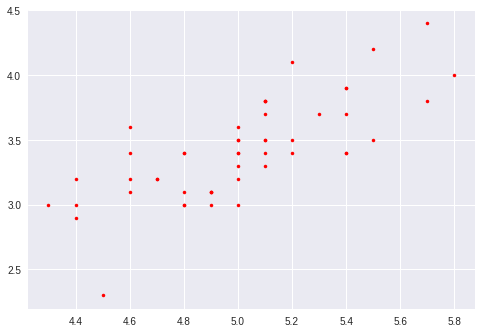

In [23]:
import matplotlib.pyplot as plt
x = iris[:50,0]
y = iris[:50,1]
plt.plot(x, y, 'r.')
plt.show()

We can plot two types of flowers:

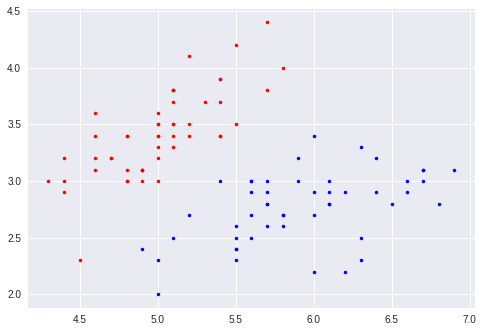

In [24]:
plt.plot( iris[:50,0], iris[:50,1], 'r.')
plt.plot( iris[51:100,0], iris[51:100,1], 'b.')


Let's do three

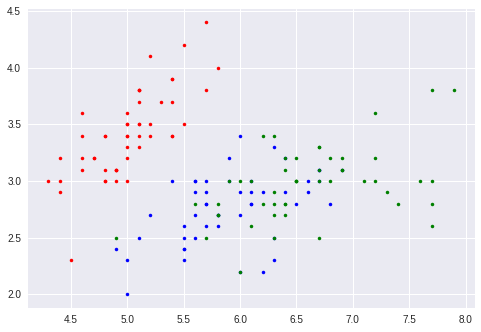

In [26]:
plt.plot( iris[:50,0], iris[:50,1], 'r.')
plt.plot( iris[51:100,0], iris[51:100,1], 'b.')
plt.plot( iris[101:,0], iris[101:,1], 'g.')

##DEAP notebook

Here we have an example [DEAP notebook](https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb) from Github. 
We can visit or we can invite.
If we invite we need to **!pip install deap **